In [ ]:
  from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np



**READING THE DATA FRAME**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/datasets/statlog-heart-dataset.csv')

df.head()

,age,sex,chest,pressure,cholestoral,bloodsugar,electrocardiographic,heartRate,exInducedAngina,oldpeak,slope,numMajorVessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,yes
1,57,1,2,124,261,0,0,141,0,0.3,1,0,7,yes
2,56,1,3,130,256,1,2,142,1,0.6,2,1,6,yes
3,59,1,4,110,239,0,2,142,1,1.2,2,1,7,yes
4,60,1,4,140,293,0,2,170,0,1.2,2,2,7,yes


**TRAINING EXAMPLES**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['class'])
Y = df['class']

# Separando os dados em treinamento(75%) e teste(25%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)


**--- LEARNING THE RF CLASSIFIER**

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, Y_train)

**--- LEARNING THE kNN CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)

neigh.fit(X_train, Y_train)

KNeighborsClassifier()

### **PARTIAL DEPENDENCE PLOTS**

**--- Creating the PDPs for the RF model**



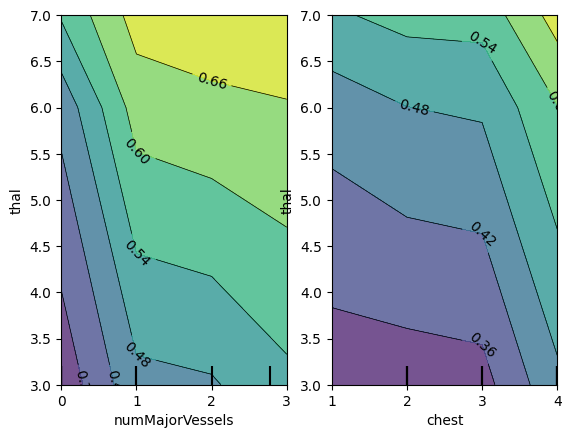

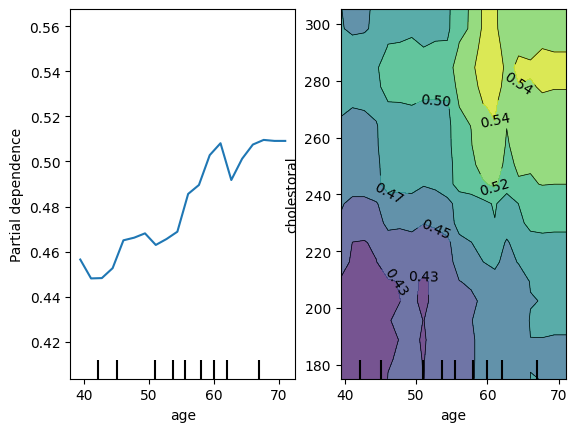

In [ ]:

disp1 = PartialDependenceDisplay.from_estimator(rf, X_test, [(11,12),(2,12)],grid_resolution=20)

disp1 = PartialDependenceDisplay.from_estimator(rf, X_test, [0,(0,4)],grid_resolution=20)

OBS.: 1. High values of both Thal and numVajorVessels indicate a prediction of heart disease. 2. Low values of both Thal and chest indicate the absence of heart disease. 4. Higher ages result on presence of disease. 4. The relation between age and cholesterol is not so clear, although there are higher disease probablities for old people with high cholesterol.

**--- Creating the PDPs for the KNN model**



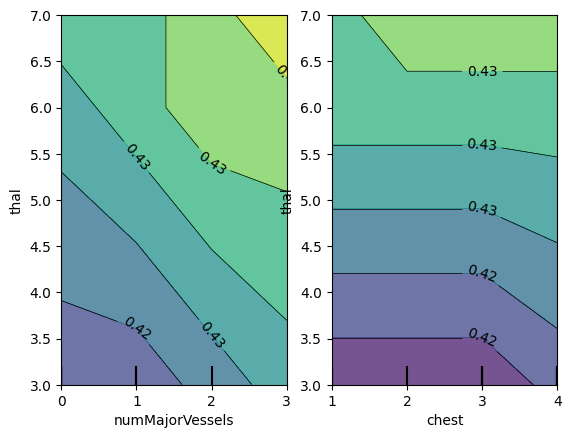

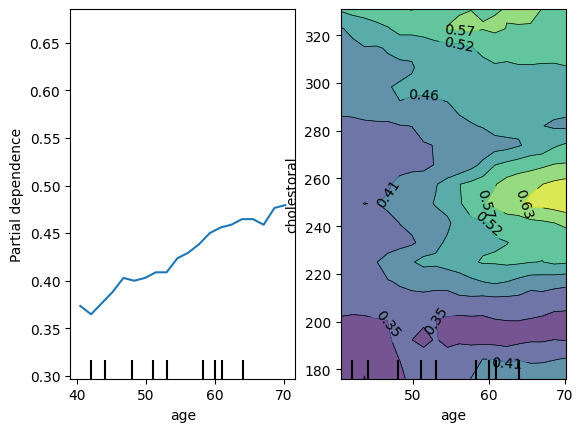

In [ ]:

disp1 = PartialDependenceDisplay.from_estimator(neigh, X_test, [(11,12),(2,12)],grid_resolution=20)

disp1 = PartialDependenceDisplay.from_estimator(neigh, X_test, [0,(0,4)],grid_resolution=20)

Obs.: The PDPs for the kNN classifier in general bring the same messages when compared to the PDP produced for RF classifier. There are differences in the predicted probabilities (compared to RF), possible resulting from the effect of class imbalancing.

### **INDIVIDUAL CONDITIONAL EXPECTATION**

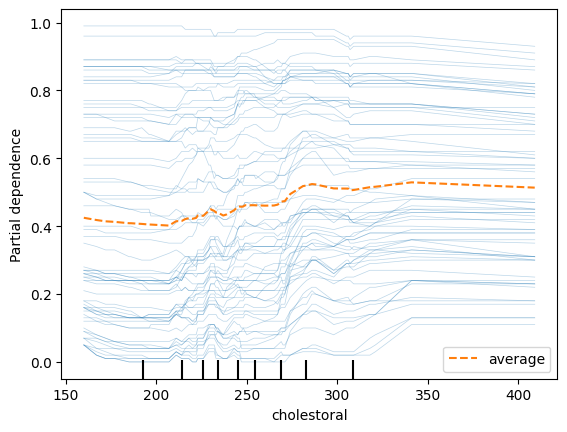

In [ ]:
disp1 = PartialDependenceDisplay.from_estimator(rf, X_test, [4], kind='both')

OBS.: Changes in cholesterol seem to impact individuals with low predicted probabilities of disease returned by the RF model.

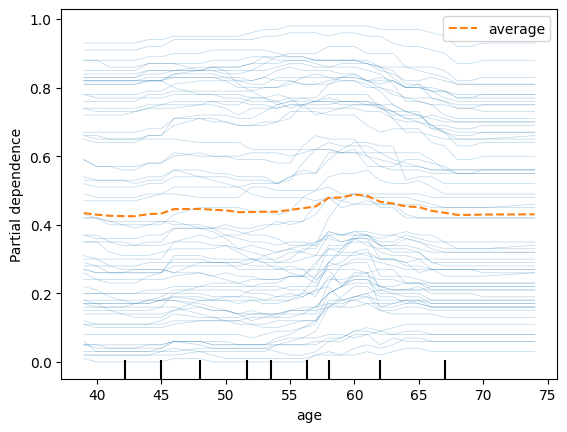

In [ ]:
disp1 = PartialDependenceDisplay.from_estimator(rf, X_test, [0], kind='both')

OBS.: Risk of disease increases for 55 years-old people. Apparently the risk is reduced close to 70, but this effect may be cause by the low presence of old people in the training data (i.e., maybe it is not a reliable effect).